## Step 3. Exploratory analysis:
* univariate, paired distribution
* feature correlations
* missing data visualization

In [268]:
import pandas as pd
import numpy as np
import missingno as mn  # missing data visualization
import seaborn as sns   # visualization
# self-written functions:
import sys
sys.path.append("funcs/")
import data_visualizer as vis
from importlib import reload
reload(vis)

<module 'data_visualizer' from 'funcs/data_visualizer.py'>

In [257]:
df = pd.read_parquet('clean_data/ahp.parquet.gzip')
df.head()

dt_sold   yr_sold   mo_sold  yr_built  yr_remodel  bldg_class  bldg_type  \
0 2010-03-25  1.694126 -1.173800  0.141222    0.988023    0.069174          0   
1 2009-04-10  0.932085 -0.808958  0.804174    0.607295    0.069174          0   
2 2010-01-15  1.694126 -1.903484 -0.621174    1.083204   -0.864388          0   
3 2010-04-19  1.694126 -0.808958  1.135650    1.083204    0.069174          0   
4 2010-03-22  1.694126 -1.173800 -2.377998    0.416932   -0.164217          0   

   house_style  zoning  neighborhd  ...  lot_shape  pave_dr  roof_matl  \
0            5       5          22  ...          0        2          1   
1            5       5          23  ...          0        2          1   
2            2       5          15  ...          3        2          1   
3            5       5          26  ...          3        2          1   
4            0       5          23  ...          0        0          1   

   roof_style   op_area   ep_area   wd_area  sale_price  day_sold  wday_sold  
0           1 -0.054312 -0.376746 -0.730006   -0.645503  1.334822  -0.021917  
1           1  0.394983 -0.376746 -0.730006         NaN -0.541956   0.488143  
2           1  0.065500 -0.376746 -0.730006   -0.916814  0.083636   0.488143  
3           1 -0.713278 -0.376746  0.047715   -0.096571  0.584111  -1.552095  
4           1  0.170336 -0.376746 -0.730006   -0.544550  0.959466  -1.552095  

[5 rows x 58 columns]

### Univariate plot & bivariate plot

function applied: 

* vis.univariate_dashboard(df, fontsize=None, rotation=0)
* vis.bivariate_dashboard(df, key_feature, key_dtype=None, stacked=False, fontsize=None)

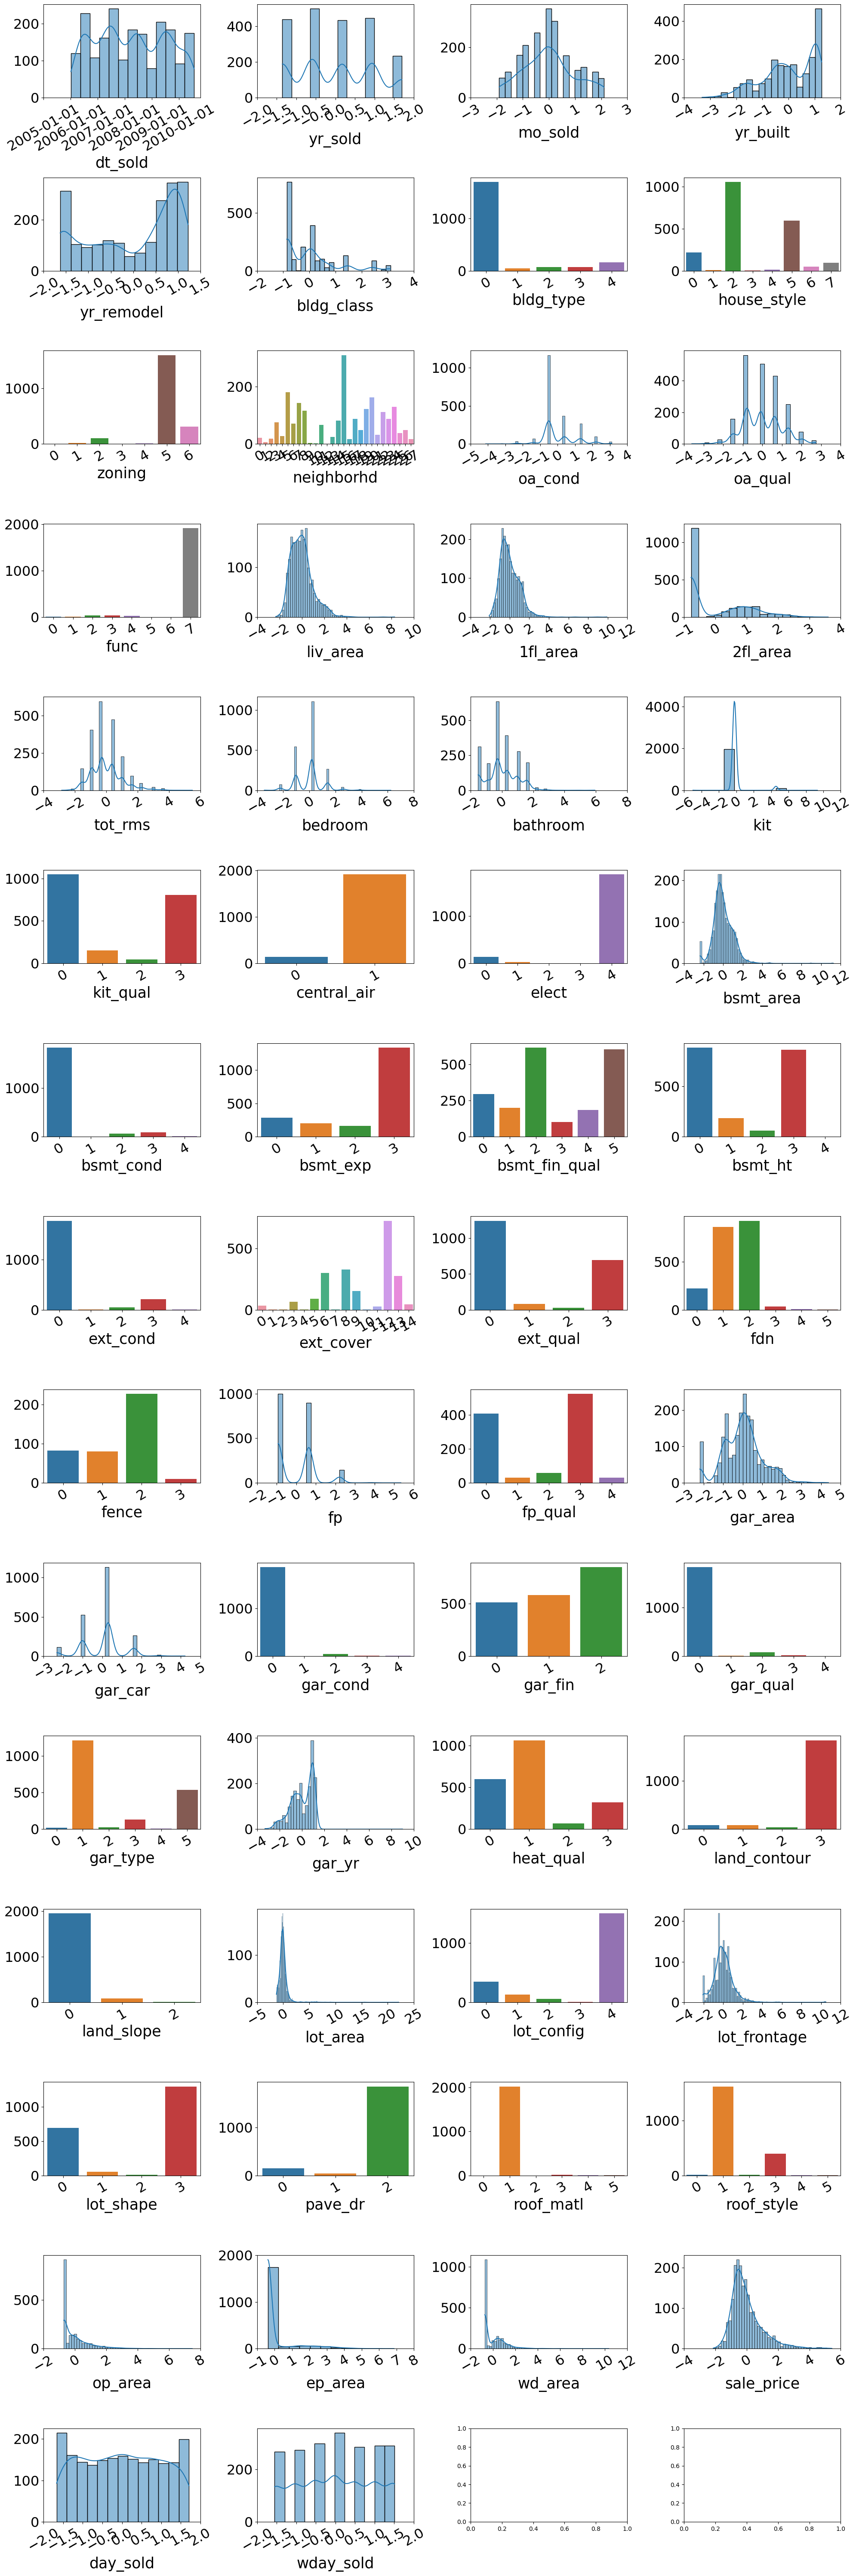

In [248]:
uni_plt = vis.univariate_dashboard(df, fontsize=25, rotation=30)

key_feature gar_fin is treated as categorical variable due to dtype=category
Auto font size: 20


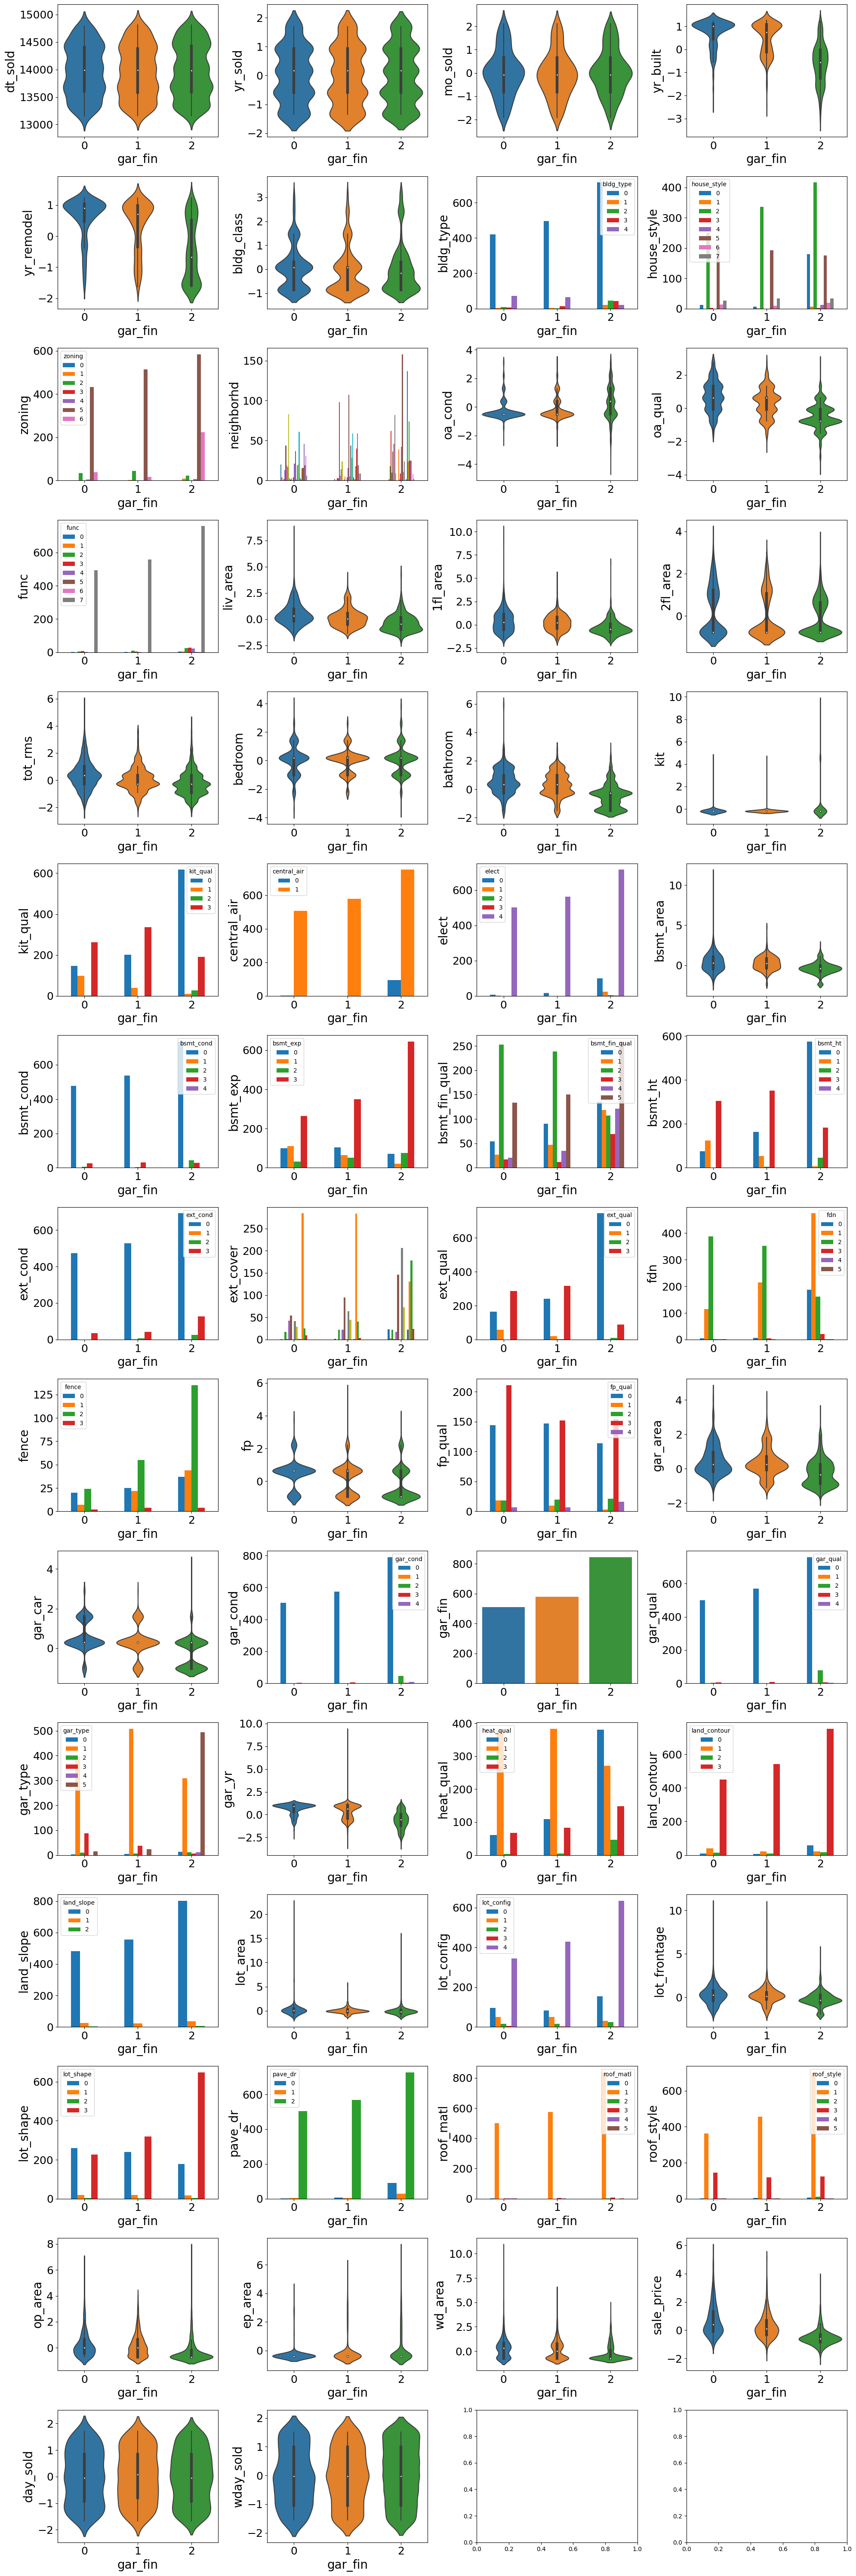

In [262]:
# bivariate dashboard grouped by categorical outcome:
bi1 = vis.bivariate_dashboard(df, key_feature='gar_fin', stacked=False)

Auto font size: 20


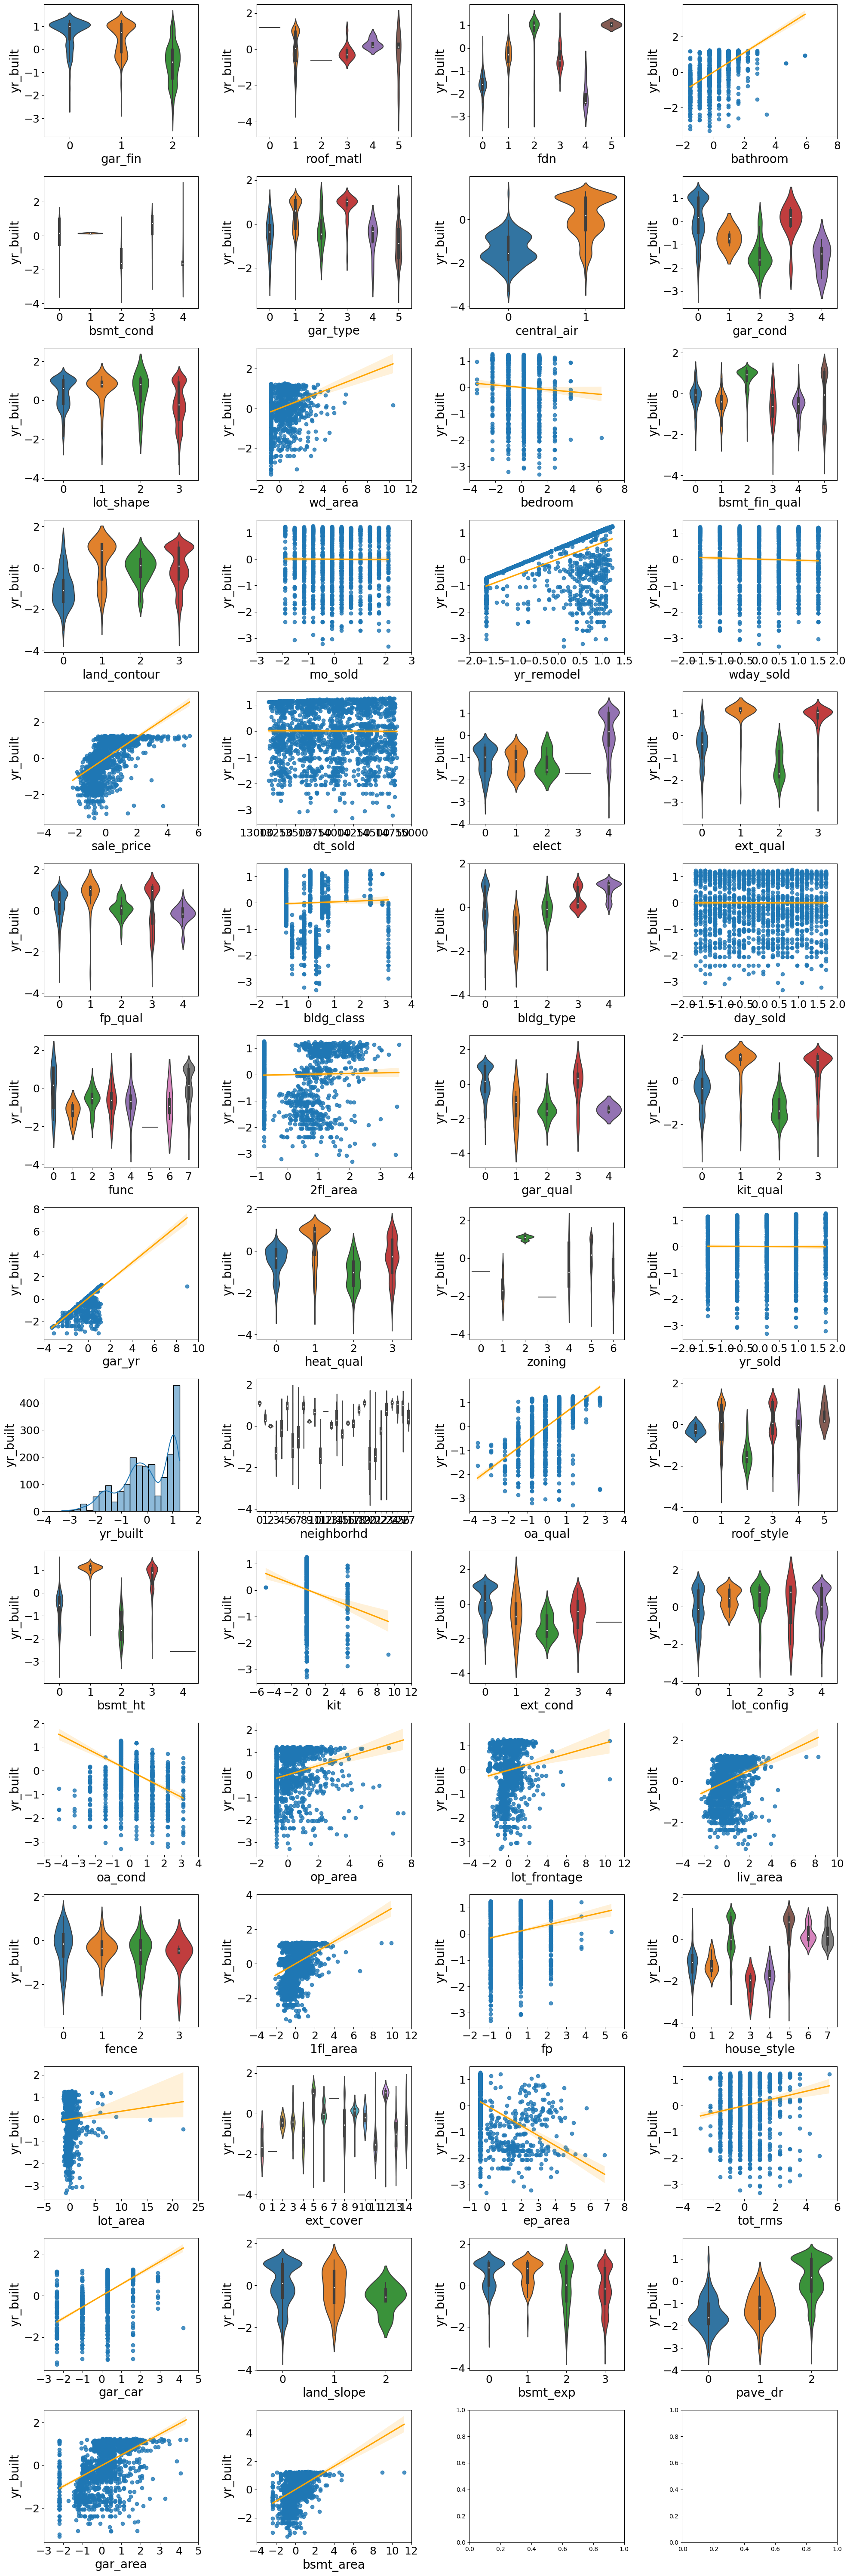

In [266]:
# bivariate dashboard grouped by continuous outcome:
bi2 = vis.bivariate_dashboard(df, key_feature='yr_built', key_dtype='continuous')

key_feature gar_fin is treated as categorical variable due to dtype=category
Auto font size: 20


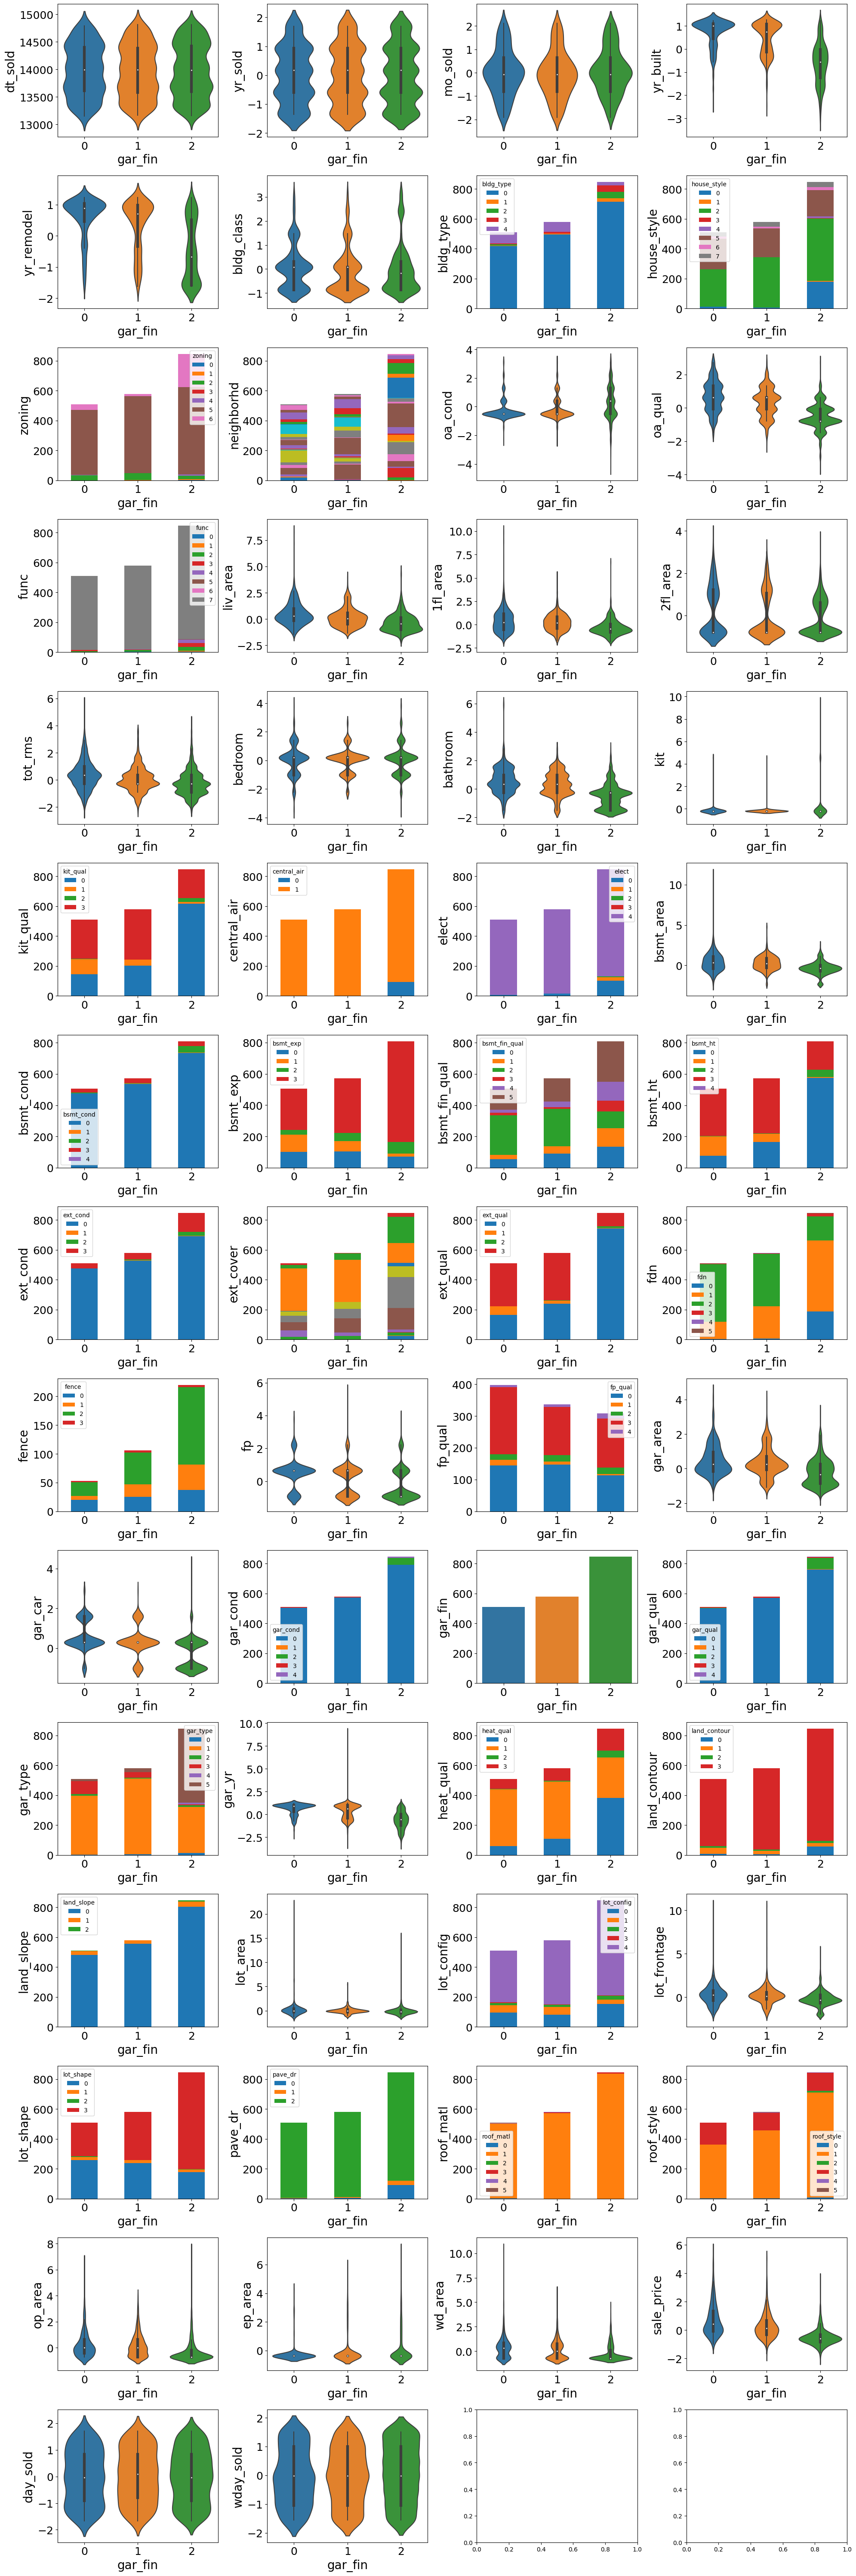

In [267]:
# stacked plot:
bi1 = vis.bivariate_dashboard(df, key_feature='gar_fin', stacked=True)

## Correlation Plot
function applied: vis.(correlation)

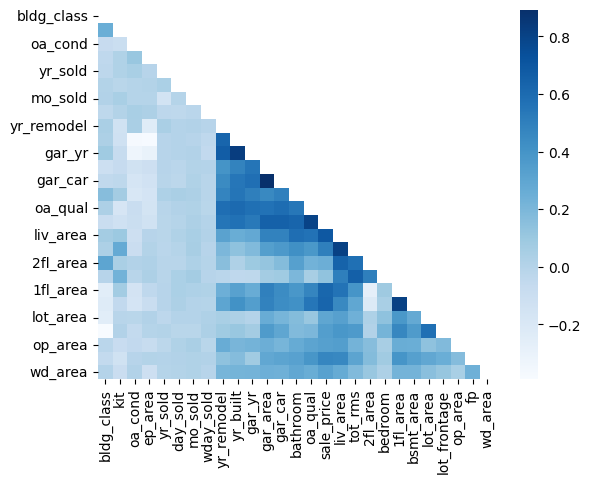

In [168]:
corr = df.select_dtypes('float').corr()
plt1 = vis.correlation(corr)

In [ ]:
# Missingness visualization:
yes_na = raw.loc[:,raw.isna().mean()!=0]
# mn.matrix(yes_na)
mn.heatmap(yes_na)